이전 챕터까지는 선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현했다. 이번에는 파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해본다. <br><br>
예를 들어 파이토치에서는 선형 회귀 모델이 nn.Linear()라는 함수로, 또 평균 제곱오차가 nn.functional.mse_loss()라는 함수로 구현되어져있다.

## 1. 단순 선형 회귀 구현하기
---

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
torch.manual_seed(1)

이제 데이터를 선언한다. 아래 데이터는 y = 2x로 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 W=2, b=0임을 알고 있는 상태다.<br>
우리의 목표는 모델이 W와 b의 값을 제대로 찾아내는 것이다.

In [24]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

데이터를 정의했으니 이제 선형 회귀 모델을 구현할 차례다.<br>
nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받는다.

In [25]:
model = nn.Linear(1, 1)

torch.nn.Linear 인자로 1, 1을 사용했는데 이는 하나의 입력 x에 대해서 하나의 출력 y를 가지기 때문이다. <br>
model에는 가중치 W와 편향 b가 저장되어져있다. 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있다.

In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b에 해당된다. 두 값 모두 현재는 랜덤 초기화가 되어져있다. 그리고 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있다. <br><br>
이제 옵티마이저를 정의하고 model.parameters()를 사용하여 W와 b를 전달한다.<br>
학습률(learning rate)은 0.01로 정한다.

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


학습이 완료되었다. Cost의 값이 매우 작다. W와 b의 값도 최적화가 되었는지 확인해본다. <br>
x에 임의의 값을 4를 넣어 모델이 예측하는 y의 값을 확인해본다.

In [29]:
new_var = torch.FloatTensor([[4.0]])

pred_y = model(new_var)

print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


이제 학습 후의 W와 b의 값을 출력해본다.

In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


W의 값이 2에 가깝고, b의 값이 0에 가까운 것을 볼 수 있다.<br><br>
- H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 한다.
- 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산이다.
- 학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산이다.
- 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다.
- cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산이다.

## 2. 다중 선형 회귀 구현하기
---
이제 nn.Linear()와 nn.functional.mse_loss()로 다중 선형 회귀를 구현해본다. 사실 코드 자체는 달라지는 건 거의 없고, nn.Linear()의 인자값과 학습률(learning rate)만 조절해준다.

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
torch.manual_seed(1)

이제 데이터를 선언해준다. 여기서는 3개의 x로 부터 하나의 y를 예측하는 문제다.<br>
즉, H(x) = w1x1 + w2x2 + w3x3 + b

In [40]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 81, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

데이터를 정의했으니 이제 선형 회귀 모델을 구현한다. ```nn.Linear()```는 입력의 차원, 출력의 차원을 인수로 받는다.

In [41]:
# input_dim = 3, output_dim = 1
model = nn.Linear(3,1)

In [42]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


첫번째 출력되는 것이 3개의 w고, 두번째 출력되는 것이 b에 해당된다. 두 값 모두 현재는 랜덤 초기화가 되어져있다. 그리고 두 출력 결과 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있다. <br><br>
이제 옵티마이저를 정의한다. model.parameters()를 사용하여 3개의 w와 b를 전달한다. 학습률(learning rate)은 0.00001로 정한다 (0.01로 하게 되면 발산하기 때문)
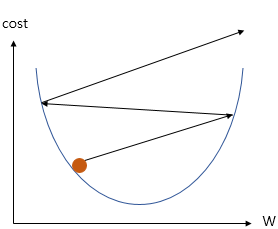

위의 그림은 학습률이 모델에 필요한 크기보다 높을 때, 기울기가 발산하는 현상을 보여준다.

In [43]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [44]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)과 동일
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31478.777344
Epoch  100/2000 Cost: 2.288997
Epoch  200/2000 Cost: 2.269025
Epoch  300/2000 Cost: 2.250343
Epoch  400/2000 Cost: 2.232847
Epoch  500/2000 Cost: 2.216474
Epoch  600/2000 Cost: 2.201149
Epoch  700/2000 Cost: 2.186759
Epoch  800/2000 Cost: 2.173261
Epoch  900/2000 Cost: 2.160644
Epoch 1000/2000 Cost: 2.148797
Epoch 1100/2000 Cost: 2.137662
Epoch 1200/2000 Cost: 2.127201
Epoch 1300/2000 Cost: 2.117379
Epoch 1400/2000 Cost: 2.108119
Epoch 1500/2000 Cost: 2.099442
Epoch 1600/2000 Cost: 2.091246
Epoch 1700/2000 Cost: 2.083529
Epoch 1800/2000 Cost: 2.076251
Epoch 1900/2000 Cost: 2.069404
Epoch 2000/2000 Cost: 2.062903


x에 임의의 입력값을 넣어 모델이 예측하는 y의 값을 확인해본다.

In [45]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.3475]], grad_fn=<AddmmBackward>)


In [46]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0173, 0.3702, 0.6292]], requires_grad=True), Parameter containing:
tensor([0.2797], requires_grad=True)]
